# Exercises - optimization and regularization

1. Use the fashion MNIST data. Build a baseline model and evaluate its performance. Go through (one at a time) early stopping, weight regularization, dropout, and batch normalization, and see how these change the performance of your model. Which method is - in isolation - best when applied to your model?
1. Now combine the methods, such as applying early stopping *and* dropout simultaneously. Optimally, try to work through all combinations (also of more than 2 methods).
1. Using a validation set and what you learned in (2), aim for the best model possible (preferably *without* using convolutional layers).

**Note**: You may want to use:
1. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
1. https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization

**See slides for more details!**

# Setup

Consider implementing a validation set.

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,test_size=0.2, random_state=42)

x_train_all = x_train_all / 255
x_train     = x_train / 255
x_val       = x_val  / 255
x_test      = x_test / 255

In [2]:
# I suggest you implement a function to quickly build models, 
# where you can tune size, regularization, dropout, and batch normalization (and perhaps more!)
# You may draw inspiration from the function from the slides, but note that the large model from there may be
# prohibitively large!
def build_model(size, activation, weight_regularizer, dropout, batch_norm):
    layers = [tf.keras.layers.Flatten(input_shape=(28, 28))]
    
    nb_layers = size
    nb_neurons = size ** 2 * 4
    
    for i in range(nb_layers):
        layers.append(tf.keras.layers.Dense(nb_neurons, activation=activation, 
                                            kernel_regularizer=weight_regularizer))
        if batch_norm:
            layers.append(tf.keras.layers.BatchNormalization())
        if dropout:
            layers.append(tf.keras.layers.Dropout(0.2))

    layers.append(tf.keras.layers.Dense(10, activation='softmax'))
    
    model = tf.keras.models.Sequential(layers)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(0.0001),
        metrics=['sparse_categorical_crossentropy', 'accuracy'],
        )
    
    return model

In [3]:
def plot_histories(histories, names, measure,xlim_max=40,ylim_min=0,ylim_max=10):
    measure_to_pretty = {'sparse_categorical_crossentropy': 'loss', 
                         'accuracy': 'accuracy'}
    nb_histories = len(histories)
    fig = plt.figure(figsize=plt.figaspect(0.1 * nb_histories))
    
    for i in range(nb_histories):
        ax = fig.add_subplot(1, nb_histories, i + 1)
        ax.plot(histories[i].history[f'val_{measure}'], 
                label=f'Test {measure_to_pretty[measure]}, {names[i]}')
        plt.xlabel('Epoch')
        plt.ylabel(measure)
        plt.legend()
        plt.xlim(0,xlim_max)
        plt.ylim(ylim_min,ylim_max)
        plt.draw()

    plt.show()

# Exercise 1

Use the fashion MNIST data. Build a baseline model and evaluate its performance. Go through (one at a time) early stopping, weight regularization, dropout, and batch normalization, and see how these change the performance of your model. Which method is - in isolation - best when applied to your model?

### Answer: 
It seems, from the lecture notes that dropout (in isolation) produces the best perfomance. Batch normalization combined with early stopping seems promising. Batch normalization and dropout perhaps combined with early stopping might also be a strong candidate.

# Exercise 2

Now combine the methods, such as applying early stopping *and* dropout simultaneously. Optimally, try to work through all combinations (also of more than 2 methods).

In [4]:
model_large_bn_es    = build_model(10, 'relu', None, False, True)
callback_large_bn_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_large_bn_es  = model_large_bn_es.fit(x_train, y_train, 
                                      validation_data=(x_val, y_val), 
                                      epochs=100, verbose=1,  
                                      callbacks=[callback_large_bn_es])

Epoch 1/100
1500/1500 [==============================] - 27s 16ms/step - loss: 0.7836 - sparse_categorical_crossentropy: 0.7836 - accuracy: 0.7277 - val_loss: 0.4846 - val_sparse_categorical_crossentropy: 0.4846 - val_accuracy: 0.8273
Epoch 2/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.5221 - sparse_categorical_crossentropy: 0.5221 - accuracy: 0.8129 - val_loss: 0.4343 - val_sparse_categorical_crossentropy: 0.4343 - val_accuracy: 0.8426
Epoch 3/100
1500/1500 [==============================] - 28s 18ms/step - loss: 0.4522 - sparse_categorical_crossentropy: 0.4522 - accuracy: 0.8374 - val_loss: 0.4001 - val_sparse_categorical_crossentropy: 0.4001 - val_accuracy: 0.8553
Epoch 4/100
1500/1500 [==============================] - 29s 19ms/step - loss: 0.4069 - sparse_categorical_crossentropy: 0.4069 - accuracy: 0.8518 - val_loss: 0.3899 - val_sparse_categorical_crossentropy: 0.3899 - val_accuracy: 0.8548
Epoch 5/100
1500/1500 [==============================] - 34s

In [5]:
model_large_do_bn_es    = build_model(10, 'relu', None, True, True)
callback_large_do_bn_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_large_do_bn_es  = model_large_do_bn_es.fit(x_train, y_train, 
                                      validation_data=(x_val, y_val), 
                                      epochs=100, verbose=1,  
                                      callbacks=[callback_large_do_bn_es])

Epoch 1/100
1500/1500 [==============================] - 36s 23ms/step - loss: 1.4963 - sparse_categorical_crossentropy: 1.4963 - accuracy: 0.4986 - val_loss: 0.6684 - val_sparse_categorical_crossentropy: 0.6684 - val_accuracy: 0.7573
Epoch 2/100
1500/1500 [==============================] - 33s 22ms/step - loss: 0.8529 - sparse_categorical_crossentropy: 0.8529 - accuracy: 0.6958 - val_loss: 0.5356 - val_sparse_categorical_crossentropy: 0.5356 - val_accuracy: 0.8005
Epoch 3/100
1500/1500 [==============================] - 37s 25ms/step - loss: 0.7104 - sparse_categorical_crossentropy: 0.7104 - accuracy: 0.7542 - val_loss: 0.4564 - val_sparse_categorical_crossentropy: 0.4564 - val_accuracy: 0.8332
Epoch 4/100
1500/1500 [==============================] - 33s 22ms/step - loss: 0.6299 - sparse_categorical_crossentropy: 0.6299 - accuracy: 0.7806 - val_loss: 0.4185 - val_sparse_categorical_crossentropy: 0.4185 - val_accuracy: 0.8458
Epoch 5/100
1500/1500 [==============================] - 28s

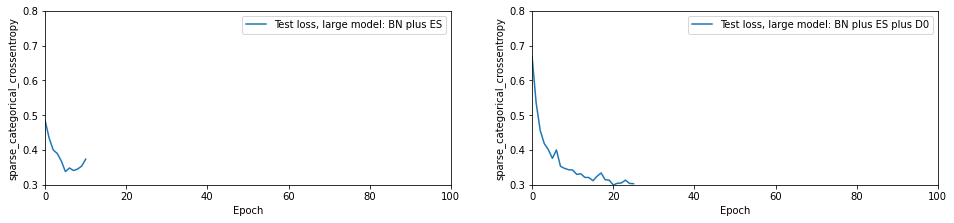

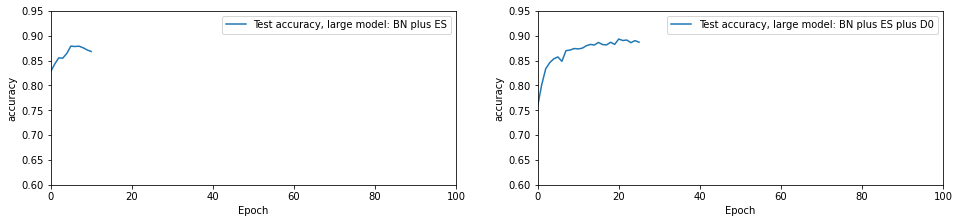

In [6]:
plot_histories(histories=[history_large_bn_es, history_large_do_bn_es], 
               names=['large model: BN plus ES','large model: BN plus ES plus D0'], 
               measure='sparse_categorical_crossentropy',            
               xlim_max=100,ylim_min=0.3,ylim_max=0.8)
plot_histories(histories=[history_large_bn_es, history_large_do_bn_es], 
               names=['large model: BN plus ES','large model: BN plus ES plus D0'],
               measure='accuracy', 
               xlim_max=100,ylim_min=0.6,ylim_max=0.95)

In [7]:
model_large_bn_es.evaluate(x_val, y_val)
model_large_do_bn_es.evaluate(x_val, y_val)

375/375 [==============================] - 2s 6ms/step - loss: 0.3032 - sparse_categorical_crossentropy: 0.3032 - accuracy: 0.8869: 1s - loss: 0.3076 - sparse_categoric


[0.3031512200832367, 0.3031512200832367, 0.8869166374206543]

# Exercise 3

Using a validation set and what you learned in (2), aim for the best model possible (preferably *without* using convolutional layers).

In [8]:
model_large_do_bn    = build_model(10, 'relu', None, True, True)
history_large_do_bn  = model_large_do_bn.fit(x_train_all, y_train_all, 
                                      validation_data=(x_test, y_test), 
                                      epochs=100, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 35s 18ms/step - loss: 1.3737 - sparse_categorical_crossentropy: 1.3737 - accuracy: 0.5204 - val_loss: 0.6315 - val_sparse_categorical_crossentropy: 0.6315 - val_accuracy: 0.7690
Epoch 2/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7904 - sparse_categorical_crossentropy: 0.7904 - accuracy: 0.7155 - val_loss: 0.5167 - val_sparse_categorical_crossentropy: 0.5167 - val_accuracy: 0.7991
Epoch 3/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6507 - sparse_categorical_crossentropy: 0.6507 - accuracy: 0.7732 - val_loss: 0.4590 - val_sparse_categorical_crossentropy: 0.4590 - val_accuracy: 0.8363
Epoch 4/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5745 - sparse_categorical_crossentropy: 0.5745 - accuracy: 0.8000 - val_loss: 0.4216 - val_sparse_categorical_crossentropy: 0.4216 - val_accuracy: 0.8465
Epoch 5/100
1875/1875 [==============================] - 37s

1875/1875 [==============================] - 37s 20ms/step - loss: 0.1900 - sparse_categorical_crossentropy: 0.1900 - accuracy: 0.9314 - val_loss: 0.3020 - val_sparse_categorical_crossentropy: 0.3020 - val_accuracy: 0.8968
Epoch 70/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1872 - sparse_categorical_crossentropy: 0.1872 - accuracy: 0.9312 - val_loss: 0.3121 - val_sparse_categorical_crossentropy: 0.3121 - val_accuracy: 0.8981
Epoch 71/100
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1842 - sparse_categorical_crossentropy: 0.1842 - accuracy: 0.9326 - val_loss: 0.3174 - val_sparse_categorical_crossentropy: 0.3174 - val_accuracy: 0.8979
Epoch 72/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1864 - sparse_categorical_crossentropy: 0.1864 - accuracy: 0.9321 - val_loss: 0.3077 - val_sparse_categorical_crossentropy: 0.3077 - val_accuracy: 0.9005
Epoch 73/100
1875/1875 [==============================] - 42s 22ms/st

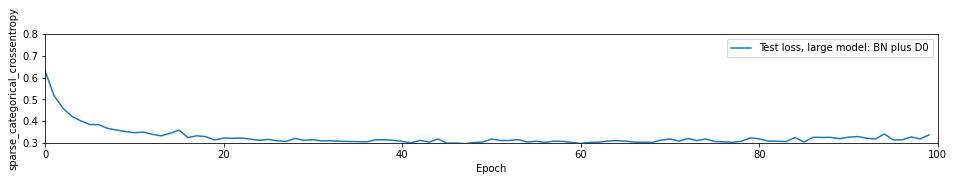

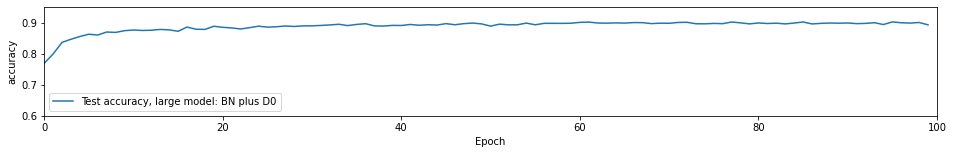

In [9]:
plot_histories(histories=[history_large_do_bn], 
               names=['large model: BN plus D0'], 
               measure='sparse_categorical_crossentropy',            
               xlim_max=100,ylim_min=0.3,ylim_max=0.8)
plot_histories(histories=[history_large_do_bn], 
               names=['large model: BN plus D0'],
               measure='accuracy', 
               xlim_max=100,ylim_min=0.6,ylim_max=0.95)

In [10]:
model_large_do_bn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3364 - sparse_categorical_crossentropy: 0.3364 - accuracy: 0.8928


[0.3363952338695526, 0.3363952338695526, 0.892799973487854]